# Business Understanding

The diamond industry is a highly competitive, market-driven industry. Diamond manufacturers and jewelry retailers need to have a deep understanding of diamond characteristics and market trends to make informed decisions regarding production, inventory, pricing, and marketing. Consumers seek diamond jewelry that aligns with their preferences. Therefore, data analysis on the diamond dataset can provide valuable insights to understand the market and optimize business operations.

# Business Benefits

- Operational efficiency improvement: Data analysis can help diamond manufacturers optimize production and inventory management, reduce wastage, and enhance operational efficiency.
- Sales enhancement: By understanding customer preferences, both manufacturers and retailers can offer products that better align with market demand.
- Increased customer satisfaction: Providing more relevant recommendations to consumers can improve customer satisfaction.
- Stronger competition: With a better understanding of the market and pricing, diamond businesses can compete more effectively in a competitive global marketplace.

# Expected Outcomes

- Enhanced understanding of the diamond market.
- Improved operational efficiency in diamond production and inventory management.
- Increased sales of diamond jewelry.
- Higher customer satisfaction.

# Data Understanding

- Dataset Overview :

The diamond dataset is a collection of data related to various attributes of diamonds, including carat weight, cut quality, color, clarity, depth percentage, table percentage, price, and more. Understanding this dataset is crucial for conducting meaningful analyses and drawing insights about the characteristics and pricing of diamonds.

- Data Sources :

Load the dataset in the seaborn library

- Data Size and Structure :

The dataset consists of 29708 rows and 10 columns.
Each row represents an individual diamond.
The columns include both numerical and categorical data, such as carat, cut, color, clarity, price, etc.

- Data Attributes :

    - Carat: A numerical value representing the weight of the diamond in carats.
    - Cut: A categorical attribute describing the quality of the diamond's cut (e.g., Fair, Good, Very Good, Premium, Ideal).
    - Color: A categorical attribute describing the color of the diamond (ranging from J, the lowest color grade, to D, the highest).
    - Clarity: A categorical attribute describing the clarity of the diamond (e.g., I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF).
    - Depth: A numerical attribute representing the depth percentage of the diamond.
    - Table: A numerical attribute representing the table percentage of the diamond.
    - Price: The price of the diamond in a given currency.
    - x (Length): Measures the length of the diamond in millimeters. This is the measurement of the diagonal length from one end of the diamond to the other.
    - y (Width): Measures the width of the diamond in millimeters. This is a measurement of the diagonal width from side to side.
    - z (Depth): Measures the depth of the diamond in millimeters. This is the vertical distance from the top of the diamond to the bottom.

# Data Preparation

- Python Version : 3.11.4
- Packages : Pandas, Numpy, Matplotlib, Seaborn

In [1]:
import sys
print(sys.version)

3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
diamond = sns.load_dataset('diamonds')

In [5]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29708 entries, 0 to 29707
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    29708 non-null  float64 
 1   cut      29708 non-null  category
 2   color    29708 non-null  category
 3   clarity  29708 non-null  category
 4   depth    29708 non-null  float64 
 5   table    29708 non-null  float64 
 6   price    29708 non-null  int64   
 7   x        29707 non-null  float64 
 8   y        29707 non-null  float64 
 9   z        29707 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 1.7 MB


In [7]:
diamond.shape

(29708, 10)

# Identify NaN values

In [8]:
diamond.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          1
y          1
z          1
dtype: int64

# Dealing with NaN values

In [10]:
mean_x = diamond['x'].mean()
mean_y = diamond['y'].mean()
mean_z = diamond['z'].mean()

In [11]:
diamond['x'].fillna(mean_x, inplace=True)
diamond['y'].fillna(mean_y, inplace=True)
diamond['z'].fillna(mean_z, inplace=True)

In [12]:
diamond.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# Check for duplicates

In [15]:
diamond[diamond.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
28593,0.30,Ideal,G,VS2,63.0,55.0,675,4.31,4.29,2.71
29029,0.31,Ideal,H,VVS1,61.6,55.0,687,4.37,4.40,2.70
29508,0.32,Ideal,E,VS2,62.1,55.0,702,4.36,4.40,2.72
29591,0.32,Ideal,D,SI1,62.9,56.0,706,4.40,4.38,2.76


# Removes duplicate rows

In [16]:
diamond.drop_duplicates(inplace=True)

In [18]:
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.950000,3.980000,2.430000
1,0.21,Premium,E,SI1,59.8,61.0,326,3.890000,3.840000,2.310000
2,0.23,Good,E,VS1,56.9,65.0,327,4.050000,4.070000,2.310000
3,0.29,Premium,I,VS2,62.4,58.0,334,4.200000,4.230000,2.630000
4,0.31,Good,J,SI2,63.3,58.0,335,4.340000,4.350000,2.750000
...,...,...,...,...,...,...,...,...,...,...
29703,0.40,Ideal,E,SI1,62.5,57.0,707,4.700000,4.740000,2.950000
29704,0.32,Ideal,E,VS1,61.9,56.0,707,4.420000,4.470000,2.750000
29705,0.31,Very Good,G,VVS2,62.6,57.0,707,4.290000,4.330000,2.700000
29706,0.31,Very Good,G,VVS2,60.0,62.0,707,4.400000,4.440000,2.650000


# Exploratory Data Analysis (EDA) 

In [20]:
# Determine the carat range you want
rentang_karat = [0, 0.5, 1, 1.5, 2, 2.5, 3]

# Create a new column 'Carat_Range' based on the carat range
diamond['Karat_Range'] = pd.cut(diamond['carat'], bins=rentang_karat, include_lowest=True)

# Calculate the total price in each carat range
total_harga_per_karat = diamond.groupby('Karat_Range')['price'].sum()

# Calculate the total price of the entire dataset
total_harga_seluruh_dataset = diamond['price'].sum()

# Calculate the percentage price within each carat range
persentase_harga_karat = (total_harga_per_karat / total_harga_seluruh_dataset) * 100

In [21]:
print(persentase_harga_karat)

Karat_Range
(-0.001, 0.5]     1.632665
(0.5, 1.0]       16.530097
(1.0, 1.5]       43.743495
(1.5, 2.0]       22.436697
(2.0, 2.5]       14.610392
(2.5, 3.0]        0.794487
Name: price, dtype: float64


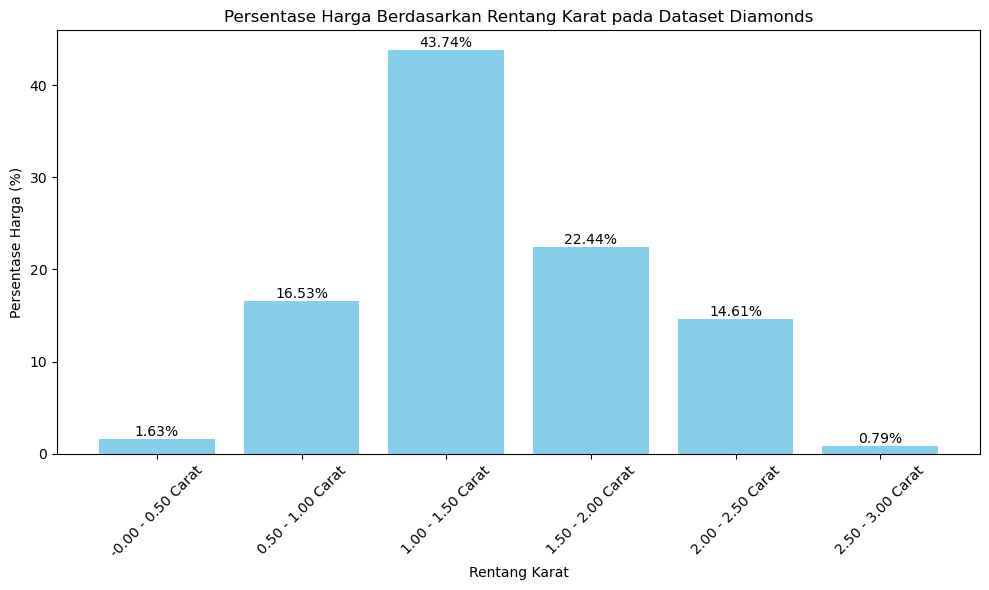

In [22]:
# Data to be used in the bar plot
karat_ranges = [f"{range.left:.2f} - {range.right:.2f} Carat" for range in persentase_harga_karat.index]
prices = persentase_harga_karat.values

# Create bar plots
plt.figure(figsize=(10, 6))
plt.bar(karat_ranges, prices, color='skyblue')
plt.xlabel('Rentang Karat')
plt.ylabel('Persentase Harga (%)')
plt.title('Persentase Harga Berdasarkan Rentang Karat pada Dataset Diamonds')

# Added percentage labels above each bar
for i, price in enumerate(prices):
    plt.text(i, price, f'{price:.2f}%', ha='center', va='bottom')

# Displays bar plots
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on the histogram above depicts the distribution of diamond prices across various carat categories, allowing us to see the price spread and how frequently diamonds with specific carats appear in the diamond dataset. Taller bars indicate more popular carat categories.
A total of 43.74% of the diamonds in the dataset have carats between 1.00 and 1.50. This indicates that diamonds with carats in this range are very common or popular in the diamond market. It reflects a higher consumer demand for diamonds within this carat range.

In [28]:
# Counts the number of diamonds for each clarity level
purity_distribution = diamond['clarity'].value_counts()

# Calculating percentages
total_diamonds = len(diamond)
purity_percentage = (purity_distribution / total_diamonds) * 100

# Sort by clarity level
purity_percentage = purity_percentage.sort_values(ascending=False)

In [29]:
purity_percentage

SI1     26.320408
SI2     22.729574
VS2     22.101853
VS1     14.714319
VVS2     7.114171
VVS1     3.766326
IF       1.633424
I1       1.619925
Name: clarity, dtype: float64

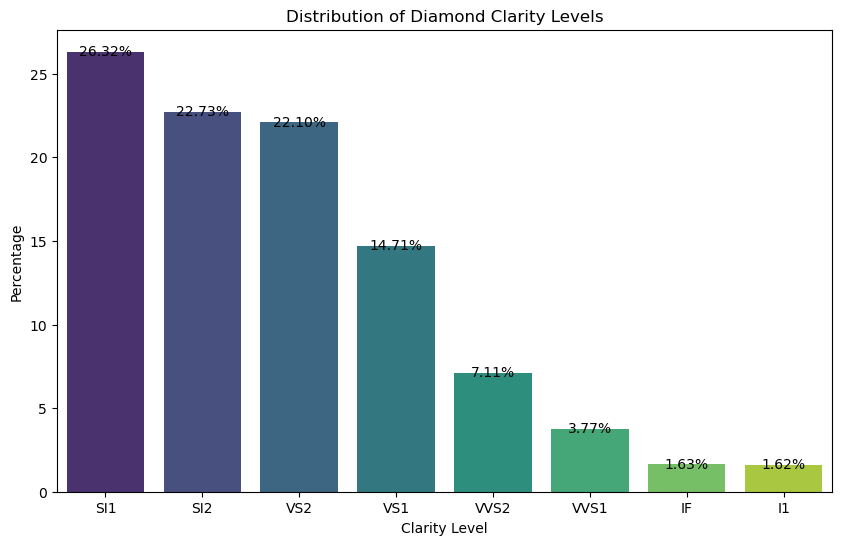

In [33]:
# Create a clarity level distribution plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=purity_percentage.index, y=purity_percentage.values, palette='viridis', order=purity_percentage.index)
plt.title('Distribution of Diamond Clarity Levels')
plt.xlabel('Clarity Level')
plt.ylabel('Percentage')

# Added percentage labels above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

plt.show()

Based on the data above, the SI1 clarity level of 26.32% is a common choice. Most of the diamonds in the diamond dataset have defects that tend to be small or moderate. Despite some flaws, diamonds at this grade are still of good quality and are often a popular choice due to their more affordable price. Meanwhile, the IF clarity level of 1.63% shows that the diamond in the category is practically free from internal defects, and I1 of 1.62% is the lowest in terms of quality with very obvious defects.

In [34]:
# Counts the number of diamonds for each clarity level
color_distribution = diamond['color'].value_counts()

# Calculating percentages
total_diamonds = len(diamond)
color_percentage = (color_distribution / total_diamonds) * 100

# Sort by clarity level
color_percentage = color_percentage.sort_values(ascending=False)

In [35]:
color_percentage

G    20.380682
H    18.203908
F    16.752725
E    15.264419
I    12.119064
D    10.586885
J     6.692315
Name: color, dtype: float64

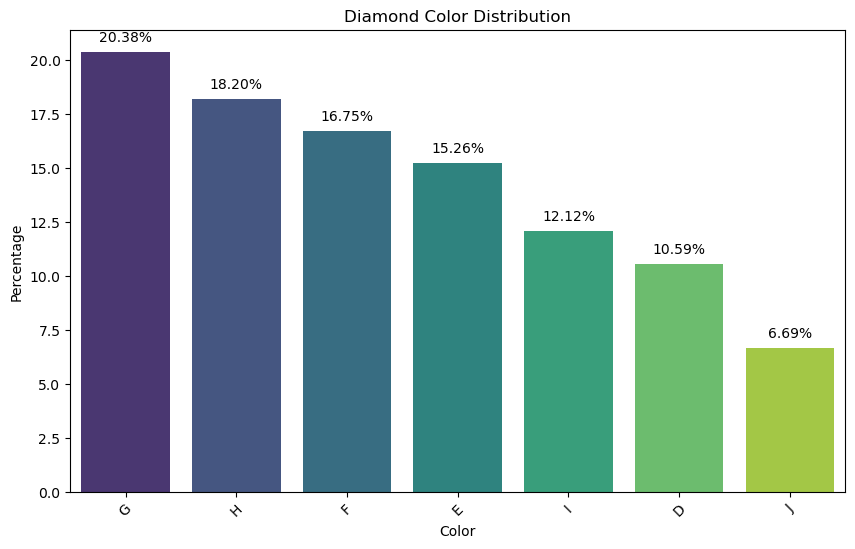

In [38]:
# Create a color distribution plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=color_percentage.index, y=color_percentage.values, order=color_percentage.index, palette='viridis')
plt.title('Diamond Color Distribution')
plt.xlabel('Color')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  # To rotate the x-axis labels for easier reading

# Adds a percentage above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

plt.show()

Based on the data above, the color of diamonds in category G is 20.38% one of the common colors. G color diamonds are barely visible and have almost no color. Meanwhile, 6.69% of diamonds in the J category may have a more visible color. J color diamonds may be a more affordable option but have little visible color. Diamonds with colors that are as close to colorless as G tend to command higher prices due to their high color quality. On the other hand, diamonds with more visible colors like J may be a more affordable option.

In [57]:
# Calculate the average price by type of piece
avg_prices_by_cut = diamond.groupby('cut')['price'].mean().reset_index()

# Calculate the relative percentage price of each type of discount
total_price = diamond['price'].sum()
avg_prices_by_cut['price_percentage'] = (avg_prices_by_cut['price'] / total_price) * 100

# Sort by average price
avg_prices_by_cut = avg_prices_by_cut.sort_values(by='price', ascending=False)

In [58]:
avg_prices_by_cut

,cut,price,price_percentage
1,Premium,6685.918125,0.003736
4,Fair,5884.896311,0.003288
0,Ideal,5874.648558,0.003283
2,Very Good,5775.174077,0.003227
3,Good,5485.195681,0.003065


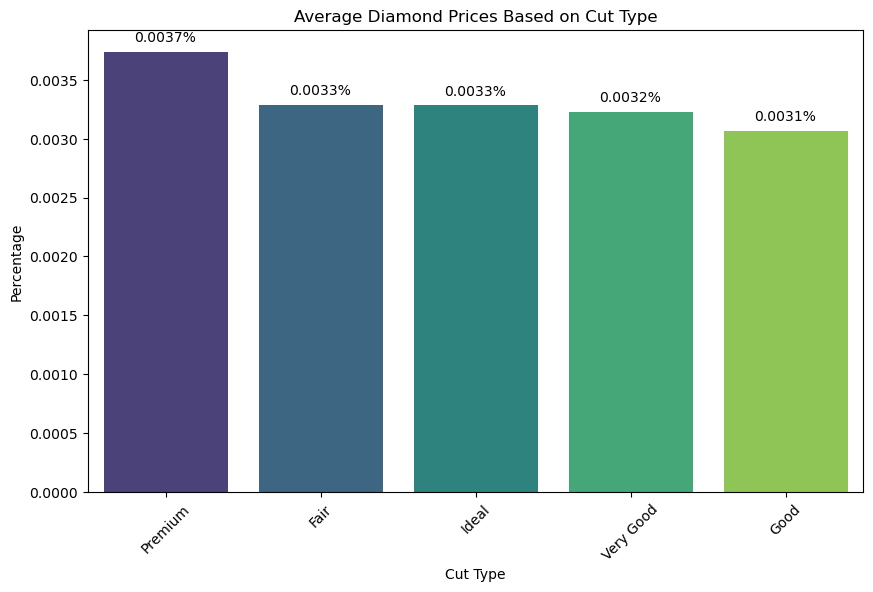

In [60]:
# Create a color distribution plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=avg_prices_by_cut['cut'], y=avg_prices_by_cut['price_percentage'], order=avg_prices_by_cut['cut'], palette='viridis')
plt.title('Average Diamond Prices Based on Cut Type')
plt.xlabel('Cut Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  # To rotate the x-axis labels for easier reading

# Adds a percentage above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

plt.show()

Based on the data above, the Premium cut type of 0.0037% is the cut type with the highest average price among all cut types. This may be due to the excellent cut quality, which produces diamonds with exceptional sparkle and appearance. The lowest cut type, namely Good at 0.0031%, has the most affordable average price among all cut types. Good cut diamonds may have some drawbacks in cut quality compared to other cuts, but are often a more economical choice.

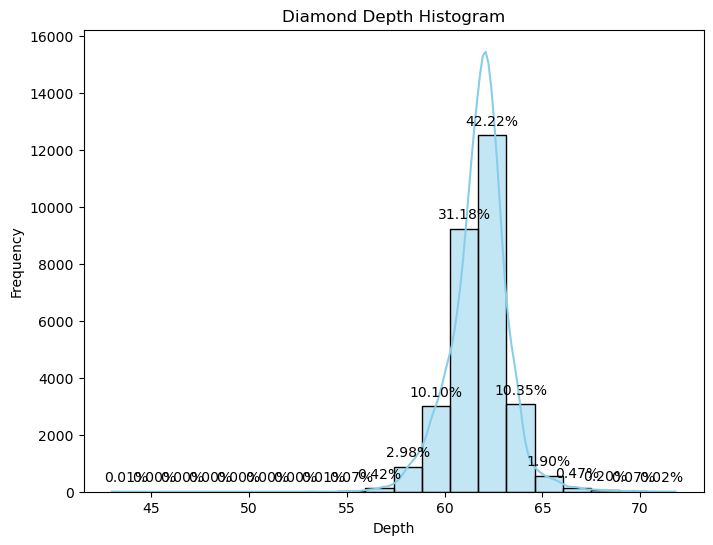

In [67]:
# Create a depth histogram
plt.figure(figsize=(8, 6))
ax = sns.histplot(diamond['depth'], bins=20, kde=True, color='skyblue')
plt.title('Diamond Depth Histogram')
plt.xlabel('Depth')
plt.ylabel('Frequency')

# Calculate the percentages and add them above the histogram bars
total_data = len(diamond)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_data:.2%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

plt.show()

Based on the data above, the depth level ranges from 60 to 65 indicating that most diamonds have a depth level in this range. The highest peak is around 62 which is 42.22%, which indicates that the depth level of 62 is the most common.